<hr/>

# Introduction to Data Science
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Quadratic Discriminant Analysis
- Cross-validation

<hr/>

<h1><font color="darkblue">Classification</font></h1>

- Based on a **training set** of labeled points, assign class labels to unknown vectors in the **query set**.  

> **Training set**
><br>
><br>
>$\qquad \displaystyle T = \big\{ (x_i, y_i) \big\}$ 
><br>
><br>
> where $x_i\in \mathbb{R}^d$ are feature sets and $y_i$ is the known class membership which takes only a (small) number of discrete values.

<nbsp/>

> **Query/Test set**
><br>
><br>
>$\qquad \displaystyle Q = \big\{ x_i \big\}$ 
><br>
><br>
> where $x_i\in \mathbb{R}^d$ consist of the kind of features in $T$

### Naive Bayes Classifier

Assume _naively_ that the **features** $x_1,\ldots, x_d$ **are independent**! Choose class label $c_{k^*}$ such that _posterior is maximized_:

> $\displaystyle k^* = \operatorname{argmax}_{k=1}^K \left\{ \pi(c_k)\,{\cal{}L}\!_\mathbf{x}(c_k) \right\} $
>
> $\displaystyle {\cal{}L}_{\!\boldsymbol{x}}(c_k) = p(\mathbf{x} | c_k) = \prod_{j=1}^{d} p(x_{j} \lvert c_k)$

### Detour: Model Comparison

- Bayesian hypothesis testing

> Posterior probability of a model given the data vs another (odds)
><br><br>
>$\displaystyle \frac{P(M_1 \lvert D)}{P(M_2 \lvert D)} = \frac{P(M_1)\ p(D \lvert M_1)\,\big/\,p(D)}{P(M_2)\ p(D \lvert M_2)\,\big/\,p(D)}$
>$\displaystyle = \frac{P(M_1)}{P(M_2)} \frac{p(D \lvert M_1)}{p(D \lvert M_2)}$
><br><br>
>$\displaystyle \ \ \ \ = \frac{P(M_1)}{P(M_2)}\  B(M_1,M_2 \lvert D)$
><br><br>
> Posterior odds $=$ Prior odds $\times$ the Bayes factor


- Marginal Likelihood, integral over all parameters

>$\displaystyle p(D \lvert M) = \int  p(\theta \lvert M)\ p(D \lvert \theta,M) d\theta$ 
><br><br>
> Cf. Bayes' rule
><br><br>
>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$ 

- No improper prior here!

- Complementer Hypotheses, i.e., $P(M_1) + P(M_2) = 1$ also $P(M_1 \lvert D) + P(M_2 \lvert D) = 1$ 

> Let $P$ represent $P(M_1 \lvert D)$ and $P_0$ be $P(M_1)$
><br><br>
>$\displaystyle \frac{P}{1-P} = \frac{P_0}{1-P_0} B$
><br><br>
> Hence
><br><br>
>$\displaystyle P = \left[ 1 + \frac{1-P_0}{P_0 B} \right]^{-1}   $


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


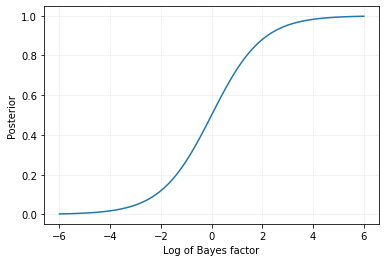

In [2]:
# Posterior as fn of ln(B)
logB = np.linspace(-6,6,100) 
B = np.exp(logB)
P0 = 0.5
P = 1 / (1 + (1-P0)/(P0*B)) 
plt.plot(logB, P,'-');
xlabel('Log of Bayes factor'); ylabel('Posterior'); 
plt.grid(alpha=0.2)

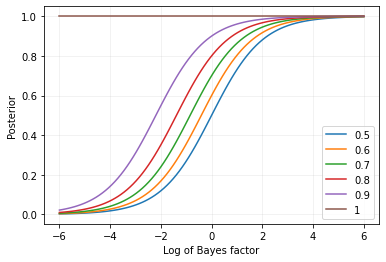

In [3]:
# Posterior as fn of ln(B)
for P0 in [0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    P = 1 / (1 + (1-P0)/(P0*B)) 
    plt.plot(logB, P,'-', label=str(P0));
# sigmoid function cf. neural networks
xlabel('Log of Bayes factor'); ylabel('Posterior'); 
legend(loc=4); ylim(None,1.05);
plt.grid(alpha=0.2)

### Bayes with Covariance Matrix

- Estimate the full covariance matrix for the classes

> Assume likelihood is **multivariate Gaussian** with common covariance matrix $\Sigma_k$, i.e.,
>
>$\displaystyle {\cal{}L}_{\!\boldsymbol{x}}(c_k) =  G(\boldsymbol{x};\boldsymbol{\mu}_k, \Sigma_k)$.
>
> Handles correlated features well

- **Linear Discriminant Analysis**: Same Covariance Matrix $\Sigma_k \equiv \Sigma$

> $\displaystyle \boldsymbol{\mu}_k = \frac{1}{|C_k|} \sum_{i: y_i = c_k} \mathbf{x}_i $ 
>
> $\displaystyle \Sigma = \frac{1}{n-K} \sum_{k=1}^K \sum_{i: y_i = c_k} (\boldsymbol{x}_i - \boldsymbol{\mu}_k)(\boldsymbol{x}_i - \boldsymbol{\mu}_k)^T$ 

- When $\Sigma_1=\Sigma_2=\Sigma$, the quadratic terms cancel from the difference
 
>$\displaystyle (\boldsymbol{x}\!-\!\boldsymbol{\mu}_1)^T\,\Sigma^{-1}(\boldsymbol{x}\!-\!\boldsymbol{\mu}_1) $ 
>$\displaystyle -\ (\boldsymbol{x}\!-\!\boldsymbol{\mu}_2)^T\,\Sigma^{-1}(\boldsymbol{x}\!-\!\boldsymbol{\mu}_2) $
>$\displaystyle = \Sigma^{-1}(\boldsymbol{\mu}_1-\boldsymbol{\mu}_2)\boldsymbol{x} - \frac{1}{2}(\boldsymbol{\mu}_1-\boldsymbol{\mu}_2)^T\Sigma^{-1}(\boldsymbol{\mu}_1-\boldsymbol{\mu}_2)
% +\log\frac{\pi(c_1)}{\pi(c_2)}+\log\frac{Z_1}{Z_2}$

In [4]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.90,stratify=y)

In [5]:
# apply LDA to Iris data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
features = [0,1]
LDA_model = LDA()
LDA_model.fit(X_train[:,features], y_train)
# predict target
LDA_preds = LDA_model.predict(X_test[:,features])

In [6]:
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.target.size, (iris.target!=LDA_model.predict(X[:,features])).sum()))
# check results
print('The (training) accuracy for LDA model prediction (using',np.size(features),'features) is: ', accuracy_score(LDA_model.predict(X_train[:,features]),y_train))
print('The (test) accuracy for LDA model prediction (using',np.size(features),'features) is: ', accuracy_score(LDA_preds,y_test))

Number of mislabeled points out of a total 150 points : 33
The (training) accuracy for LDA model prediction (using 2 features) is:  0.7333333333333333
The (test) accuracy for LDA model prediction (using 2 features) is:  0.7851851851851852


In [7]:
import matplotlib.pyplot as plt

def classification_map(X,y,classifier,i=0,j=1,X_test=None,y_test=None,h=0.1):
    '''
    h: step size in the mesh
    i: first feature number to be plotted
    j: second feature number to be plotted
    '''
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
    cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
# Points in a mesh of [x_min, m_max] x [y_min, y_max]
    x_min, x_max = X[:,i].min()-1, X[:,i].max()+1
    y_min, y_max = X[:,j].min()-1, X[:,j].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    classifier.fit(X,y)
    Z = classifier.predict(grid)
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')
    # Plot also the training points
    plt.scatter(X[:,i], X[:,j], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification with classifier "+str(classifier))
    if not X_test is None and not y_test is None: # if test set features are provided, overlay classified labels on test set as well
        plt.scatter(X_test[:,i], X_test[:,j], c=y_test,cmap=cmap_bold,marker="x")
    ax=plt.gca()
    ax.legend(["training data","test data"],loc=0,fontsize=8)
    
    return fig

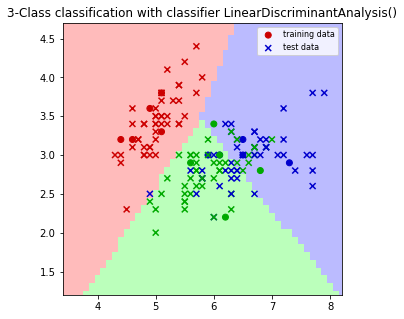

In [8]:
classification_map(X_train[:,features],y_train,LDA_model,X_test=X_test[:,features],y_test=y_test)
plt.show()

### Quadratic Discriminant Analysis

- Each class $C_k$ has a different covariance matrix $\Sigma_k$

- Consider binary problem with 2 classes - using Bayes' rule

>$ \displaystyle \frac{P(C_1|x)}{P(C_2|x)} = \frac{\pi_1}{\pi_2}\cdot \frac{{\cal{}L}_{\!\boldsymbol{x}}(C_1)}{{\cal{}L}_{\!\boldsymbol{x}}(C_2)} $

> Taking the negative logarithm, we compare
><br><br>
>$\displaystyle (x\!-\!\mu_1)^T\,\Sigma_1^{-1}(x\!-\!\mu_1) + \ln\,\lvert\Sigma_1\lvert $ 
> <br> vs.
><br>
>$\displaystyle (x\!-\!\mu_2)^T\,\Sigma_2^{-1}(x\!-\!\mu_2) + \ln\,\lvert\Sigma_2\lvert $
><br>
><br>
> If the difference is higher/lower than a threshold (based on the priors), we classify $x$ accordingly


### Exercise: QDA 

- Use the provided [training](Class-Train.csv) and [query](Class-Query.csv) sets to perform classification

> **Training** set consists of 3 columns of ($x_i$, $y_i$, $C_i$)
> <br>
> **Query** set only has 2 columns of ($x_i$, $y_i$)



>#### Best class?
>$\displaystyle \max_k \big[\ P(C_k|x)\ \big]$
>
>$\displaystyle \max_k \big[\ \pi_k {\cal{}L}_{\!x}(C_k)\ \big]$
>
>$\displaystyle \min_k \big[ -\ln\pi_k - \ln{\cal{}L}_{\!x}(C_k)\ \big]$

> #### Multivariate normal
>$\displaystyle {\cal{}L}_{\!x}(C_k) = \frac{1}{\sqrt{\lvert2\pi\Sigma_k\rvert}} \exp\left(-\frac{1}{2} (x\!-\!\mu_k)^T \Sigma_k^{-1} (x\!-\!\mu_k)\right)$
>
> Hence,
>
>$\displaystyle \min_k \Big[ \frac{1}{2} (x\!-\!\mu_k)^T \Sigma_k^{-1} (x\!-\!\mu_k) + \frac{1}{2}\ln\lvert\Sigma_k\rvert -\ln\pi_k \ \Big]$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
class MyQDA(object):
    """ Template for classifier
    """
    def fit(self,X,C):
        self.param = dict() # create an empty dictionary to store the parameters
        # your code here
        return self

    def predict(self,Y):
        Cpred = None
        # your code here
        # use linalg.det(matrix)
        # and linalg.inv(matrix)
        return Cpred

In [11]:
class MyQDA(object):
    """ Simple implementation for illustration purposes
    """       
    def fit(self,X,C):
        self.param = dict() # create an empty dictionary to store the parameters
        for k in np.unique(C):
            members = (C==k)
            prior = members.sum() / C.size
            S = X[members,:] # subset of class 
            mu = S.mean(axis=0)    
            Z = (S-mu).T # centered column vectors
            cov = Z @ Z.T / (Z.shape[1] - 1)
            self.param[k] = (prior, mu, cov)
        return self
            
    def predict(self,Y):
        Cpred = -1 * np.ones(Y.shape[0])
        for i in range(Cpred.size):
            d2min, kbest = 1e99, None
            for k in self.param:
                prior, mu, cov = self.param[k]
                diff = (Y[i,:]-mu).T
                d2 = diff.T @ np.linalg.inv(cov) @ diff / 2
                d2 += np.log(np.linalg.det(cov)) / 2 - np.log(prior) 
                if d2 < d2min: 
                    d2min,kbest = d2,k
            Cpred[i] = kbest
        return Cpred

In [12]:
# reference implementation
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

D = np.loadtxt('files/Class-Train.csv', delimiter=',')
Q = np.loadtxt('files/Class-Query.csv', delimiter=',')
X, C = D[:,0:2], D[:,2]

Cpred = MyQDA().fit(X,C).predict(Q)
Cskit =   QDA().fit(X,C).predict(Q)

print ('Number of different estimates:', (Cpred!=Cskit).sum())

Number of different estimates: 0


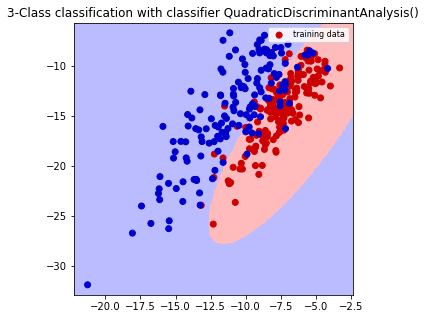

In [13]:
classification_map(X,C,classifier=QDA())
plt.show()

- LDA vs QDA

> Fewer parameters to estimate during the learning process
> <br>
> Good, if we don't have enough data, for example...
> <br>
> Think linear vs quadratic fitting and how you decide between those

<h1><font color="darkblue">Cross-Validation</font></h1>

- How to evaluate the quality of estimator?

> $k$-NN method's parameter affects the results

- 1-NN on the IRIS data was overfitting

In [14]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.20,stratify=y)

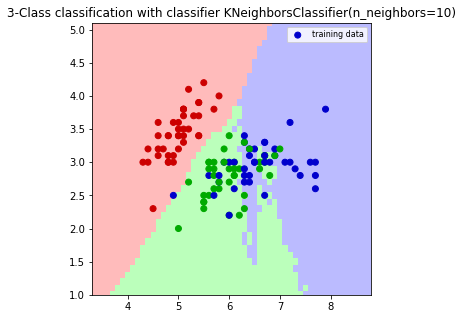

In [26]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
k = 10
features = [0,1]
knn = KNeighborsClassifier(n_neighbors=k)
classification_map(X_train[:,features],y_train,knn)
plt.show()

### Partitions of the Training set

- Random complementary subsets 

> Train on a larger subset, test on a small
> <br>
> Multiple rounds to decrease variance

### Leave-One-Out

- For each point, we train on the others and test

> Testing on $n$ points requires $n$ trainings

- Expensive!

### A Relaxed Variant

- $k$-fold cross-validation 

> 1. Create $k$ partitions of equal sizes, e.g., $k=2$ yields two subsets
> 2. Pick a single partition and train on the other $(k\!-\!1)$ 
> 3. Repeat for all $k$ partitions - requires $k$ trainings

- Leave-One-Out is a special case with $k=n$


<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png alt="image info" width="500" />

### Exercise: Cross-Validation

- Evaluate QDA on the [training](files/Class-Train.csv) set using 2-fold cross-validation

> 1. What is the fraction of correct estimates? 
> 2. What is the uncertainty of that fraction?
 
> The **training** set consists of 3 columns of ($x_i$, $y_i$, $C_i$)


In [16]:
Dc = D.copy()
# randomize and split to D1 + D2
np.random.seed(seed=42)
np.random.shuffle(Dc)
split = int(Dc[:,0].size/2)
D1, D2 = Dc[:split,:], Dc[split:,:]

# train on one, estimate on the other
# ... your code here ...

In [17]:
Dc = D.copy()
# randomize and split to D1 + D2
np.random.seed(seed=42)
np.random.shuffle(Dc)
split = Dc.shape[0] // 2
D1, D2 = Dc[:split,:], Dc[split:,:]
# train on one estimate or the other
for i,(T,Q) in enumerate([(D1,D2),(D2,D1)]):
    X, C = T[:,0:2], T[:,2]
    Cpred, Ctrue = MyQDA().fit(X,C).predict(Q[:,:2]), Q[:,2]
    print ("Case #%d - Number of mislabeled points out of a total %3d points : %2d" \
        % (i, Q.shape[0],(Ctrue!=Cpred).sum()))

Case #0 - Number of mislabeled points out of a total 157 points : 19
Case #1 - Number of mislabeled points out of a total 156 points : 20


### 3-fold CV - quick hack

In [18]:
Dc = D.copy()

# randomize and split to D1 + D2
np.random.seed(seed=42)
np.random.shuffle(Dc)
split = int(Dc[:,0].size/3)
split2 = 2*split
D1, D2, D3 = Dc[:split,:], Dc[split:split2,:], Dc[split2:]

# train on one, estimate on the other
for T,Q in [ (np.vstack([D1,D2]),D3), (np.vstack([D2,D3]),D1), (np.vstack([D3,D1]),D2)]:
    Cpred = QDA().fit(T[:,:2],T[:,2]).predict(Q[:,:2])
    Ctrue = Q[:,2]
    print ((Cpred!=Ctrue).sum(), T.shape)

11 (208, 3)
10 (209, 3)
17 (209, 3)


### Unhomework

- Implement LDA and compare to sklearn

>1. Write code without using sklearn 
>2. Apply to [training](Class-Train.csv) and [query](Class-Query.csv) sets 
>3. Compare your results to sklearn's 

- Perform 10-fold cross-validation of *MyQDA* on [this](Class-Train.csv) file

>1. Write code without using `sklearn` 
>2. Calculate average number of good classifications 
>3. Compare to sklearn 

In [19]:
from sklearn.model_selection import cross_val_score
clf = QDA()
cvscore_QDA = cross_val_score(clf, X,C, cv=10)
cvscore_QDA

array([0.8125    , 0.875     , 0.75      , 0.875     , 0.8125    ,
       0.75      , 1.        , 1.        , 1.        , 0.93333333])

### What does this mean?

In [20]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=False) 

for k, (train, test) in enumerate(k_fold.split(X)):
    clf.fit(X[train],C[train])
    Cpred = clf.predict(X[test])
    print (k, ':\t', (C[test]==Cpred).sum() / float(test.size),
        '  =  ', clf.score(X[test],C[test]) )

0 :	 0.8125   =   0.8125
1 :	 0.875   =   0.875
2 :	 0.75   =   0.75
3 :	 0.875   =   0.875
4 :	 0.8125   =   0.8125
5 :	 0.75   =   0.75
6 :	 1.0   =   1.0
7 :	 1.0   =   1.0
8 :	 0.9333333333333333   =   0.9333333333333333
9 :	 1.0   =   1.0


In [21]:
# compare with LDA
clf = LDA()
cvscore_LDA = cross_val_score(clf, X,C, cv=10)
cvscore_LDA 

array([0.8125    , 0.875     , 0.75      , 0.875     , 0.875     ,
       0.75      , 0.9375    , 1.        , 1.        , 0.93333333])

In [22]:
print('The mean Cross-validation accuracy for LDA and QDA model prediction are: ', [np.mean(cvscore_LDA), np.mean(cvscore_QDA)])

The mean Cross-validation accuracy for LDA and QDA model prediction are:  [0.8808333333333334, 0.8808333333333334]


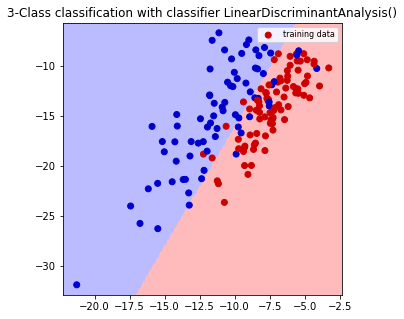

In [23]:
classification_map(X,C,classifier=LDA())
plt.show()

- Cross validation workflow in model training

<img src=https://scikit-learn.org/stable/_images/grid_search_workflow.png alt="image info" width="500" />